In [10]:
from tensorflow import keras

In [11]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib

matplotlib.rcParams['axes.unicode_minus'] = False
matplotlib.rcParams['font.family'] = 'Malgun Gothic'
matplotlib.rcParams['font.size'] = '10'

In [12]:
(train_input,train_target),(test_input,test_target) = keras.datasets.fashion_mnist.load_data()

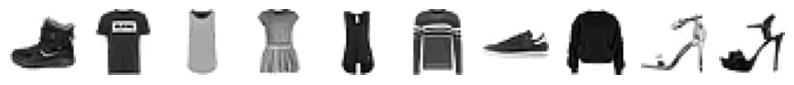

In [13]:
import matplotlib.pyplot as plt

fig,axs = plt.subplots(1,10,figsize=(10,10))
for i in range(10):
    axs[i].imshow(train_input[i],cmap='gray_r') # gray_r 현재색 반전
    axs[i].axis('off')                          # 그래프 눈금 없애기
plt.show()

In [14]:
len(train_input[0][0])
train_input.shape

(60000, 28, 28)

In [15]:
# 표준화작업
train_scaled = train_input/255.0
# train_scaled = train_scaled.reshape(-1,28*28)  # flatten층에서 사이즈 그대로 적용 28*28(배열화)
train_scaled.shape

(60000, 28, 28)

In [16]:
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [17]:
model = keras.Sequential()
model.add(keras.layers.Flatten(input_shape=(28,28)))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10,activation='softmax'))

In [18]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 100)            │        78,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# epochs = 20 => 훈련세트 정확도가 높아짐
# 검증세트를 가지고 정확도를 특정

In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# epochs 돌 때마다 loss, accuracy값을 저장
history = model.fit(train_scaled, train_target,epochs=20)

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7679 - loss: 0.6722
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8549 - loss: 0.4060
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8714 - loss: 0.3582
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8833 - loss: 0.3224
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8868 - loss: 0.3097
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8941 - loss: 0.2923
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.8998 - loss: 0.2744
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9032 - loss: 0.2651
Epoch 9/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9071 - loss: 0.2534
Epoch 10/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9097 - loss: 0.2444
Epoch 11/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.9131 - loss: 0.2333
Epoch 12/20
1500/1500 ━━━━━━━━

In [20]:
# histroy kyes index 확인
history.history.keys()

dict_keys(['accuracy', 'loss'])

In [ ]:
# train세트 검증데이터 (loss, accuracy) 그래프 -  history

In [21]:
# 변수.history[]
history.history['loss']
history.history['accuracy']

[0.8159999847412109,
 0.8575624823570251,
 0.8719791769981384,
 0.8826249837875366,
 0.8883749842643738,
 0.8924999833106995,
 0.8984583616256714,
 0.901354193687439,
 0.9064791798591614,
 0.9076458215713501,
 0.9116458296775818,
 0.9144999980926514,
 0.917020857334137,
 0.9183958172798157,
 0.9210000038146973,
 0.921916663646698,
 0.9240416884422302,
 0.9262499809265137,
 0.9298333525657654,
 0.9316666722297668]

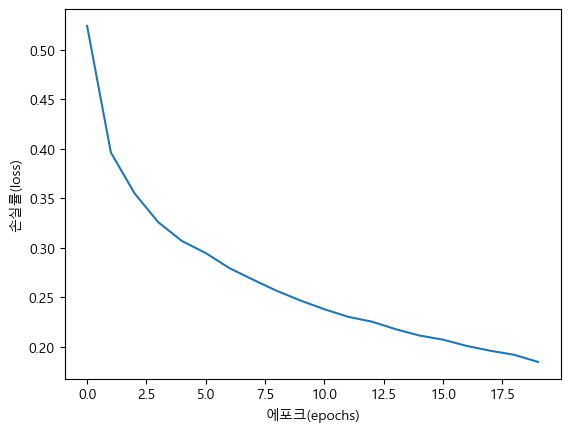

In [22]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.xlabel('에포크(epochs)')
plt.ylabel('손실률(loss)')
plt.savefig('m0529_03',dpi=300)  # 파일저장
plt.show()

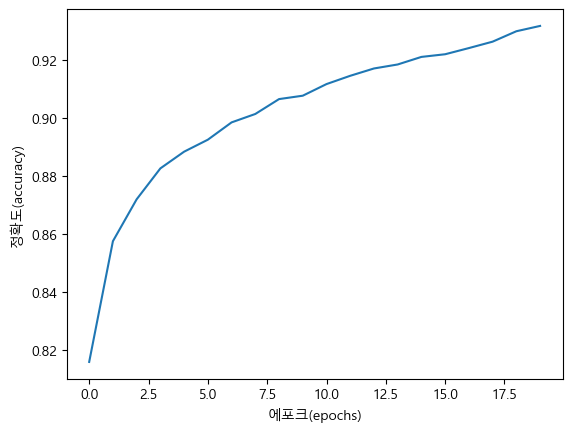

In [23]:
# 정확도
plt.plot(history.history['accuracy'])
plt.xlabel('에포크(epochs)')
plt.ylabel('정확도(accuracy)')
# plt.savefig('m0529_03',dpi=300)  # 파일저장
plt.show()

In [24]:
model.evaluate(val_scaled, val_target)

375/375 ━━━━━━━━━━━━━━━━━━━━ 0s 898us/step - accuracy: 0.8917 - loss: 0.3348


[0.33630484342575073, 0.8910833597183228]

In [ ]:
# 검증(val) 세트도 함께 검증 - history 정보로 받을 수 있음
# model.fit -  loss, accuracy 정보를 리턴(history)

In [25]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# epochs 돌 때마다 loss, accuracy값을 저장
# train_scaled, val_scaled 함께 훈련시킴
history = model.fit(train_scaled, train_target,epochs=20, 
                    validation_data=(val_scaled,val_target))

Epoch 1/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9338 - loss: 0.1790 - val_accuracy: 0.8902 - val_loss: 0.3499
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9347 - loss: 0.1752 - val_accuracy: 0.8883 - val_loss: 0.3396
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9384 - loss: 0.1678 - val_accuracy: 0.8851 - val_loss: 0.3755
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9381 - loss: 0.1662 - val_accuracy: 0.8884 - val_loss: 0.3573
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9411 - loss: 0.1586 - val_accuracy: 0.8858 - val_loss: 0.3867
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9414 - loss: 0.1554 - val_accuracy: 0.8853 - val_loss: 0.3578
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9426 - loss: 0.1550 - val_accuracy: 0.8863 - val_loss: 0.3731
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9436 - loss: 0.1530 - 

In [26]:
# 총4개 속성 = train세트 2개(accuracy, loss), test세트 2개(val_accuracy,val_loss)
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [29]:
history.history['loss']


[0.18244411051273346,
 0.17735858261585236,
 0.17231270670890808,
 0.16948489844799042,
 0.1653667688369751,
 0.16167008876800537,
 0.15955688059329987,
 0.15410330891609192,
 0.15317204594612122,
 0.1481991410255432,
 0.14690938591957092,
 0.14150838553905487,
 0.13952387869358063,
 0.13750046491622925,
 0.13547545671463013,
 0.13184361159801483,
 0.1275586187839508,
 0.12788648903369904,
 0.12572196125984192,
 0.12258955091238022]

In [30]:
history.history['val_loss']

[0.3498854637145996,
 0.3395695090293884,
 0.3754514455795288,
 0.3573066294193268,
 0.3867315948009491,
 0.3577953577041626,
 0.3731461465358734,
 0.3808468282222748,
 0.36583760380744934,
 0.3882514238357544,
 0.3683758080005646,
 0.4165075719356537,
 0.3861444890499115,
 0.4065183997154236,
 0.4112374186515808,
 0.38880717754364014,
 0.40919938683509827,
 0.4002743363380432,
 0.404835969209671,
 0.4363954961299896]

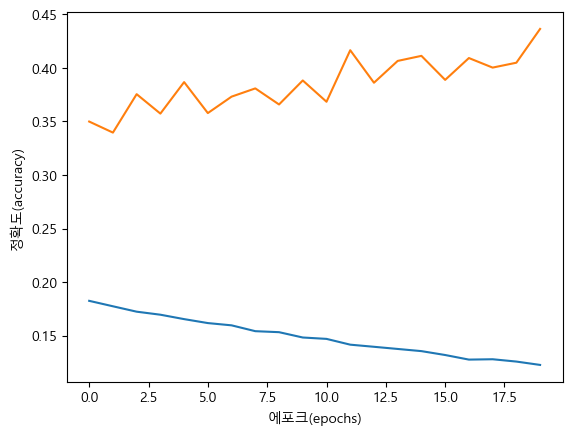

In [31]:
# 정확도
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('에포크(epochs)')
plt.ylabel('정확도(accuracy)')
# plt.savefig('m0529_03',dpi=300)  # 파일저장
plt.show()
# => 격차가 너무 큼

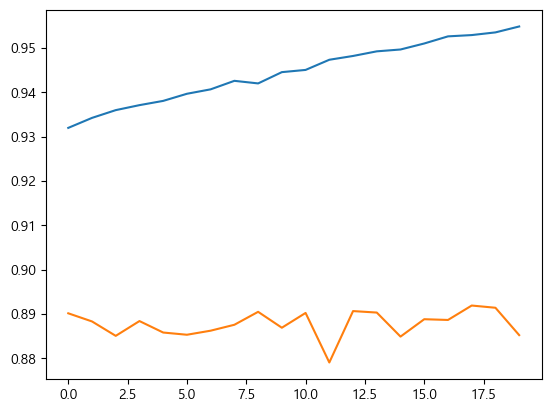

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.show()